In [ ]:
Python+OpenCV4虹膜识别

https://cungudafa.blog.csdn.net/article/details/119726505

这张图片中有1张人脸
在这张脸上有2个眼睛


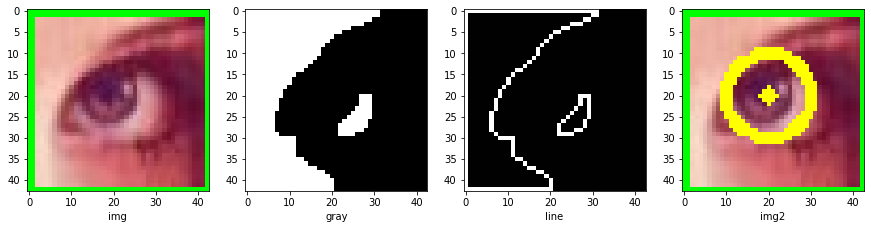

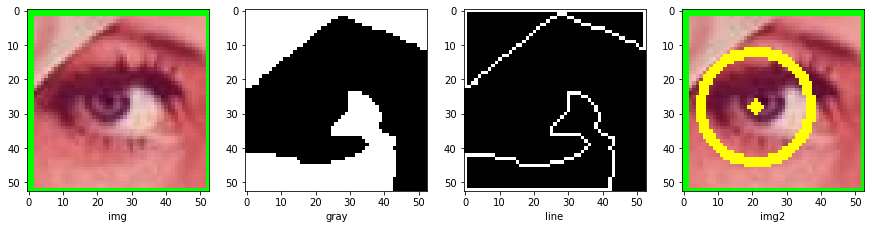

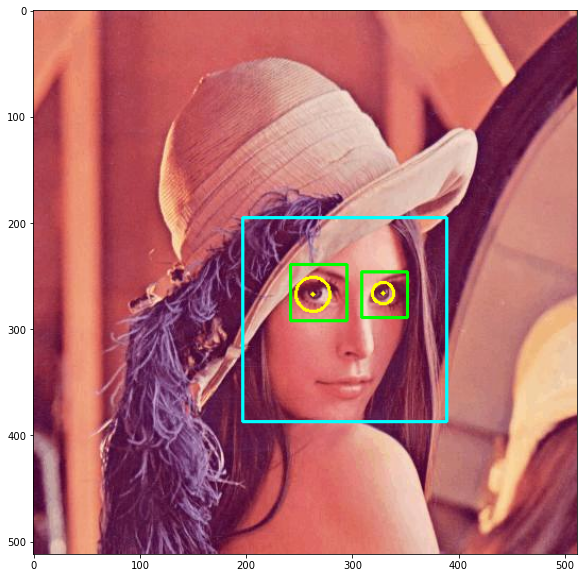

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def findeyes(path):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 灰度处理
    # 人脸识别
    face = face_cascade.detectMultiScale(gray, 2, 2)  # 参数：1、灰度图片， 2、缩放比例， 3、阈值
    print("这张图片中有%d张人脸" % len(face))
    for (x, y, w, h) in face:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)  # 绘制人脸方框

        face_gray = gray[y:y+h, x:x+w]# 在人脸的基础上识别眼睛
        face_color = img[y:y+h, x:x+w]
        # 眼睛识别
        eyes = eye_cascade.detectMultiScale(face_gray)
        print("在这张脸上有%d个眼睛" % len(eyes))
        for (e_x, e_y, e_w, e_h) in eyes:
            cv2.rectangle(face_color, (e_x, e_y), (e_x+e_w, e_y+e_h), (0, 255, 0), 2)  # 绘制眼睛方框
            roi_color = face_color[e_y:e_y+e_h, e_x:e_x+e_w] #裁剪眼睛框图
            # 霍夫圆检测虹膜===
            getHoughCircle(roi_color)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    # cv2.imshow('dst', img)
    # cv2.waitKey(0)

    
def getHoughCircle(img):
    plt.figure(figsize=(15,15))
    plt.subplot(1,4,1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#BGR转RGB
    plt.xlabel(u'img')
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 灰度化
    gray = cv2.GaussianBlur(gray, (3, 3), 5) # 高斯模糊，给出高斯模糊矩阵和标准差

    # 图像二值化，全局自适应阈值:对输入的单通道矩阵逐像素进行阈值分割
    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
    kernel = np.ones((3,3),np.uint8)# 设置卷积核3*3
    erosion = cv2.erode(binary,kernel)# 图像的腐蚀，默认迭代次数
    dst = cv2.dilate(erosion,kernel)# 图像的膨胀
    
    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.xlabel(u'gray')
    
    # 霍夫梯度法检测圆（Canny边缘检测的最大阈值，检测阶段圆心的累加器阈值，最小圆的半径，最大圆的半径）
    circles = cv2.HoughCircles(dst,cv2.HOUGH_GRADIENT,1,50,param1=100,param2=10,
                               minRadius=0,maxRadius=200)
    img2 = img
    if circles is None:
        print("未检测到霍夫圆")
    else:
        for i in circles[0:]:# 遍历矩阵每一行的数据
            item = i[0]
            # print(item)
            # cv2.circle(img2,(int(i[0]),int(i[1])),i[2],(0,255,0),2)
            cv2.circle(img2, (int(item[0]), int(item[1])), int(item[2]), (0, 255, 255), 2)
            cv2.circle(img2,(int(item[0]),int(item[1])),2,(0,255,255),-1)

        #plt.imshow(img[:,:,::-1])
        #plt.show()


    # 轮廓提取
    binaryimg = cv2.Canny(dst, 50, 200) #canny检测轮廓
    h = cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #寻找轮廓
    contours = h[0] #提取轮廓
    ret = np.ones(dst.shape, np.uint8) #创建黑色幕布
    cv2.drawContours(ret,contours,-1,(255,255,255),1) #绘制白色轮廓
    
    plt.subplot(1,4,3)
    plt.imshow(cv2.cvtColor(ret, cv2.COLOR_BGR2RGB))
    plt.xlabel(u'line')


    plt.subplot(1,4,4)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.xlabel(u'img2')
    plt.show()
    
if __name__=="__main__":
    path = 'lena.jpg'
    findeyes(path)


这张图片中有1张人脸
在这张脸上有2个眼睛


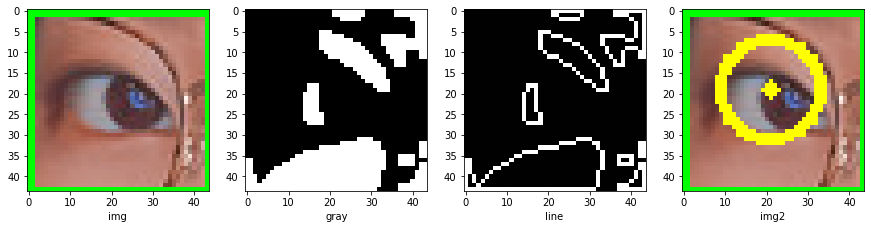

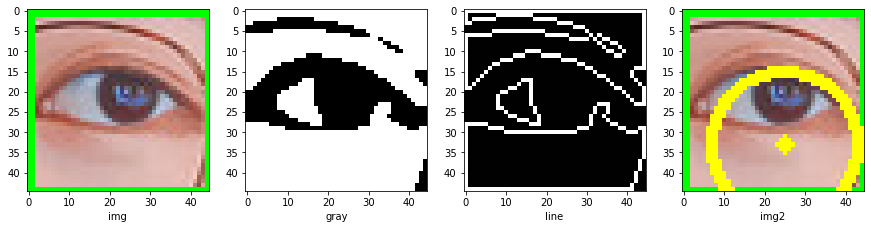

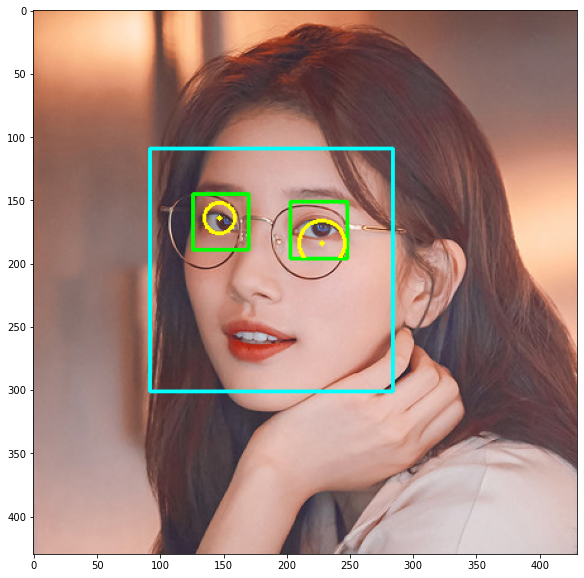

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def findeyes(path):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 灰度处理
    # 人脸识别
    face = face_cascade.detectMultiScale(gray, 2, 2)  # 参数：1、灰度图片， 2、缩放比例， 3、阈值
    print("这张图片中有%d张人脸" % len(face))
    for (x, y, w, h) in face:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)  # 绘制人脸方框

        face_gray = gray[y:y+h, x:x+w]# 在人脸的基础上识别眼睛
        face_color = img[y:y+h, x:x+w]
        # 眼睛识别
        eyes = eye_cascade.detectMultiScale(face_gray)
        print("在这张脸上有%d个眼睛" % len(eyes))
        for (e_x, e_y, e_w, e_h) in eyes:
            cv2.rectangle(face_color, (e_x, e_y), (e_x+e_w, e_y+e_h), (0, 255, 0), 2)  # 绘制眼睛方框
            roi_color = face_color[e_y:e_y+e_h, e_x:e_x+e_w] #裁剪眼睛框图
            # 霍夫圆检测虹膜===
            getHoughCircle(roi_color)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    # cv2.imshow('dst', img)
    # cv2.waitKey(0)

    
def getHoughCircle(img):
    plt.figure(figsize=(15,15))
    plt.subplot(1,4,1) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#BGR转RGB
    plt.xlabel(u'img')
    
    
    blur = cv2.GaussianBlur(img, (3, 3), 5) # 高斯模糊，给出高斯模糊矩阵和标准差
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)# 灰度化

    # 图像二值化，全局自适应阈值:对输入的单通道矩阵逐像素进行阈值分割
    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
    kernel = np.ones((3,3),np.uint8)# 设置卷积核3*3
    erosion = cv2.erode(binary,kernel)# 图像的腐蚀，默认迭代次数
    dst = cv2.dilate(erosion,kernel)# 图像的膨胀
    
    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.xlabel(u'gray')
    
    # 霍夫梯度法检测圆（Canny边缘检测的最大阈值，检测阶段圆心的累加器阈值，最小圆的半径，最大圆的半径）
    circles = cv2.HoughCircles(dst,cv2.HOUGH_GRADIENT,1,50,param1=100,param2=10,
                               minRadius=0,maxRadius=200)
    img2 = img
    if circles is None:
        print("未检测到霍夫圆")
    else:
        for i in circles[0:]:# 遍历矩阵每一行的数据
            item = i[0]
            # print(item)
            # cv2.circle(img2,(int(i[0]),int(i[1])),i[2],(0,255,0),2)
            cv2.circle(img2, (int(item[0]), int(item[1])), int(item[2]), (0, 255, 255), 2)
            cv2.circle(img2,(int(item[0]),int(item[1])),2,(0,255,255),-1)

        #plt.imshow(img[:,:,::-1])
        #plt.show()


    # 轮廓提取
    binaryimg = cv2.Canny(dst, 50, 200) #canny检测轮廓
    h = cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) #寻找轮廓
    contours = h[0] #提取轮廓
    ret = np.ones(dst.shape, np.uint8) #创建黑色幕布
    cv2.drawContours(ret,contours,-1,(255,255,255),1) #绘制白色轮廓
    
    plt.subplot(1,4,3)
    plt.imshow(cv2.cvtColor(ret, cv2.COLOR_BGR2RGB))
    plt.xlabel(u'line')


    plt.subplot(1,4,4)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.xlabel(u'img2')
    plt.show()
    
if __name__=="__main__":
    path = '1.jpg'
    findeyes(path)
